<a href="https://colab.research.google.com/github/Sagar-DC/Loan-Prediction/blob/master/Submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_url = "https://raw.githubusercontent.com/Sagar-DC/Loan-Prediction/master/Data/train_ctrUa4K.csv"
test_url = "https://raw.githubusercontent.com/Sagar-DC/Loan-Prediction/master/Data/test_lAUu6dG.csv"
subbmission_url = "https://raw.githubusercontent.com/Sagar-DC/Loan-Prediction/master/Data/sample_submission_49d68Cx.csv"

train = pd.read_csv(train_url, index_col= False)
test = pd.read_csv(test_url, index_col= False) 
submission = pd.read_csv(subbmission_url, index_col= False)

In [0]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [3]:
print("Shape of Train & Test\n", train.shape, test.shape)

Shape of Train & Test
 (614, 13) (367, 12)


In [0]:
print("Data types of Train Features\n", train.dtypes)

Data types of Train Features
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


**Handling Missing Values and Outliers**

In [0]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Imputing Missing Values

*   numerical variables: imputate using mean or median.
*   categorical variables: imputate using mode




In [4]:
train['Gender'].fillna(train['Gender'].value_counts().index[0], inplace = True)
train['Married'].fillna(train['Married'].value_counts().index[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].value_counts().index[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].value_counts().index[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].value_counts().index[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].value_counts().index[0], inplace = True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

if(train.isna().sum().sum() == 0):
  print("All missing values are imputed")

All missing values are imputed


In [5]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 

test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

if(test.isna().sum().sum() == 0):
  print("All missing values are imputed")

All missing values are imputed


Outliers

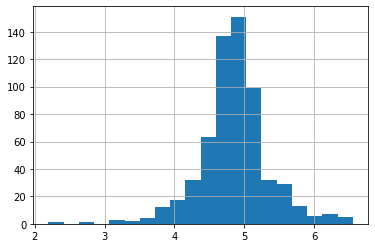

LoanAmount distribution becames much closer to normal distribution


In [7]:
np.log(train['LoanAmount']).hist(bins=20) 
plt.show()
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

print("LoanAmount distribution becames much closer to normal distribution")

In [9]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

**Building Model**

In [0]:
train = train.drop('Loan_ID', axis=1) 
test = test.drop('Loan_ID', axis=1)

In [0]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

In [0]:
x = train.drop('Loan_Status', axis=1) 
y = train.Loan_Status

In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [13]:
x = pd.get_dummies(x)
x.shape

(614, 21)

In [0]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [15]:
xgbclassifier = xgb.XGBClassifier(n_estimators=500, learning_rate=0.6)

xgbclassifier.fit(x, y)

print("Train:" , xgbclassifier.score(x, y))

Train: 1.0


In [18]:
train_pred = xgbclassifier.predict(x)

print("Train:" , accuracy_score(y, train_pred))

Train: 1.0


**Predicting Test Data**

In [19]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [20]:
test = pd.get_dummies(test)
test.shape

(367, 21)

In [0]:
test_pred = xgbclassifier.predict(test)

**Writing to sUbmission file**

In [0]:
submission.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [0]:
submission_xgb = pd.DataFrame(columns = list(submission.columns), index = submission.index)

In [23]:
submission_xgb.head()

,Loan_ID,Loan_Status
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [24]:
submission_xgb['Loan_ID'] = submission.Loan_ID
submission_xgb['Loan_Status'] = test_pred
submission_xgb.shape

(367, 2)

In [25]:
submission_xgb.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [0]:
submission_xgb['Loan_Status'].replace(1, 'Y',inplace=True) 
submission_xgb['Loan_Status'].replace(0, 'N',inplace=True)

In [27]:
submission_xgb.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [0]:
submission_xgb.to_csv("submission_xgb.csv", index= False)

In [29]:
!head submission_xgb.csv

Loan_ID,Loan_Status
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
LP001054,Y
LP001055,Y
LP001056,N
LP001059,Y


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
lr = LogisticRegression(random_state=1)     
lr.fit(x, y)     
  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_train = lr.predict(x) 

score = accuracy_score(y,pred_train)   
print('accuracy_score',score)  

accuracy_score 0.8127035830618893
